# Pt 2 - Visual encoding basics

# Why use code to generate figures?
- Help future you make adjustments
- Help others reproduce your figure
- Let others build on your code

## What makes a figure reproducible?
- The data is shared in a FAIR way
    - Findable
    - Accessible
    - Interoperable
    - Reusable
- The code is open and useable

## What if I can't share my data?
- Share the code
- Simulate similar data

## How can I make my code usable?
This is a BIG topic, but basically
- make it readable
- share the requirements
- provide instructions/explanations

# Common libraries and basic plotting

In [1]:
import matplotlib.pyplot as plt  # basic basics
import seaborn as sns  # prettier; more plot types; does stats
import pandas as pd  # plotting is just one thing it can do
import plotly.express as px  # interactive
import numpy as np # for simulating data, not for visualization


np.random.seed(18)

## Let's make a bar chart with this data:

In [2]:
x = ['a', 'b', 'c']
y = [1, 3, 2]

### Matplotlib
basic basics

<BarContainer object of 3 artists>

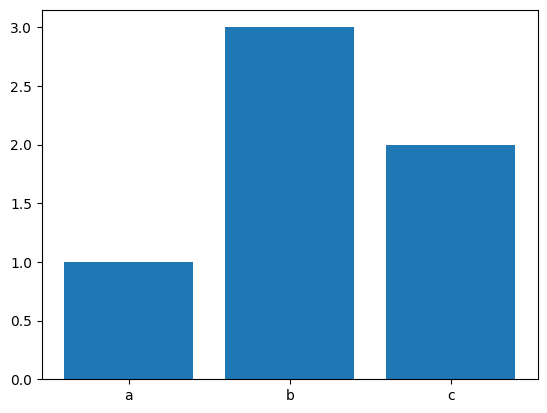

In [3]:
plt.bar(x=x, height=y)

### Seaborn
- prettier
- more plot types
- does stats
- works well with pandas dataframes

<Axes: >

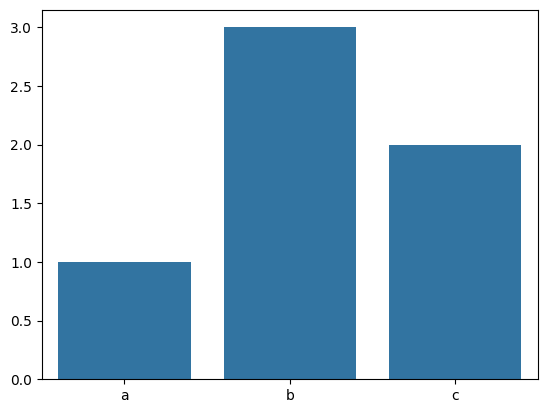

In [4]:
sns.barplot(x=x, y=y)

### Pandas
- great for dealing with tabular data
- plotting is just one thing it can do

In [5]:
df = pd.DataFrame(data={"x": x, "y": y})
df

x  y
0  a  1
1  b  3
2  c  2

<Axes: xlabel='x'>

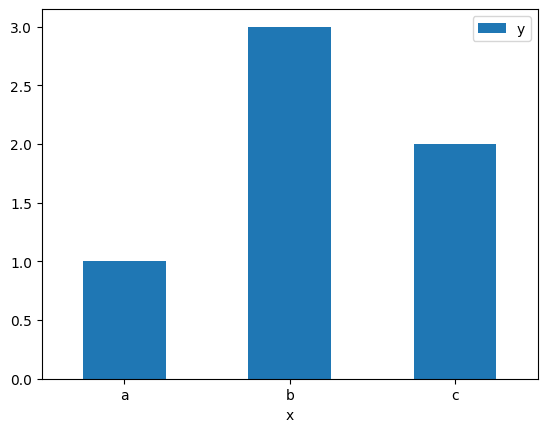

In [6]:
df.plot.bar(x="x", y="y", rot=0)

### Plotly
- interactive
- can be made into a dashboard with plotly dash

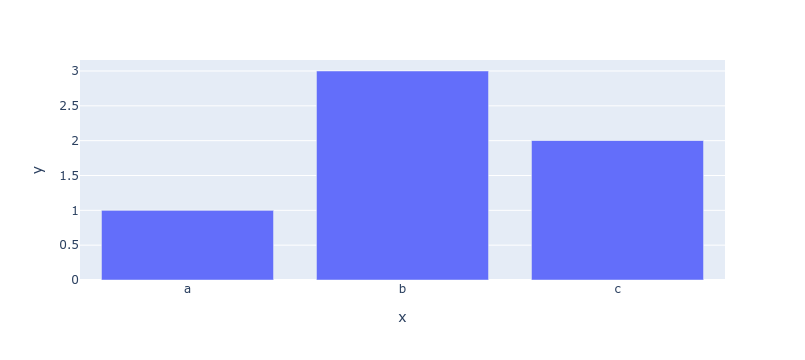

In [7]:
fig_px = px.bar(x=x, y=y)
fig_px.show()

## Now let's put them in one plot using subplots
Notice some similarities/differences in how you input the data

**It's okay to Google this!** 

TypeError: bar() got an unexpected keyword argument 'ax'

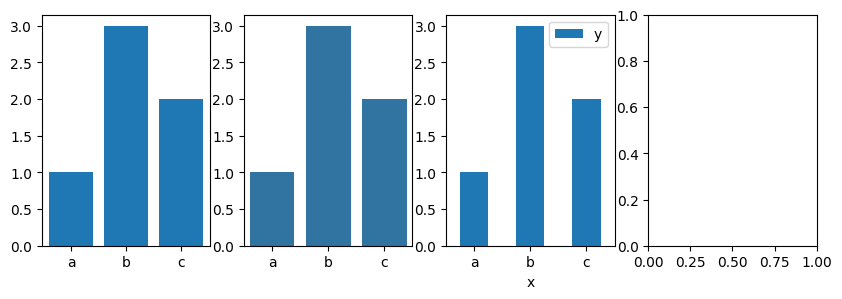

In [8]:
fig, axs = plt.subplots(1, 4, figsize=(10, 3))
axs[0].bar(x=x, height=y)
sns.barplot(x=x, y=y, ax=axs[1])
df.plot.bar(x="x", y="y", rot=0, ax=axs[2])
px.bar(x=x, y=y, ax=axs[3])

### plotly is special! 

Now we've got the basics down, let's make

# More complicated plots

while learning data vis do's and don't's

https://github.com/cxli233/FriendsDontLetFriends/tree/main

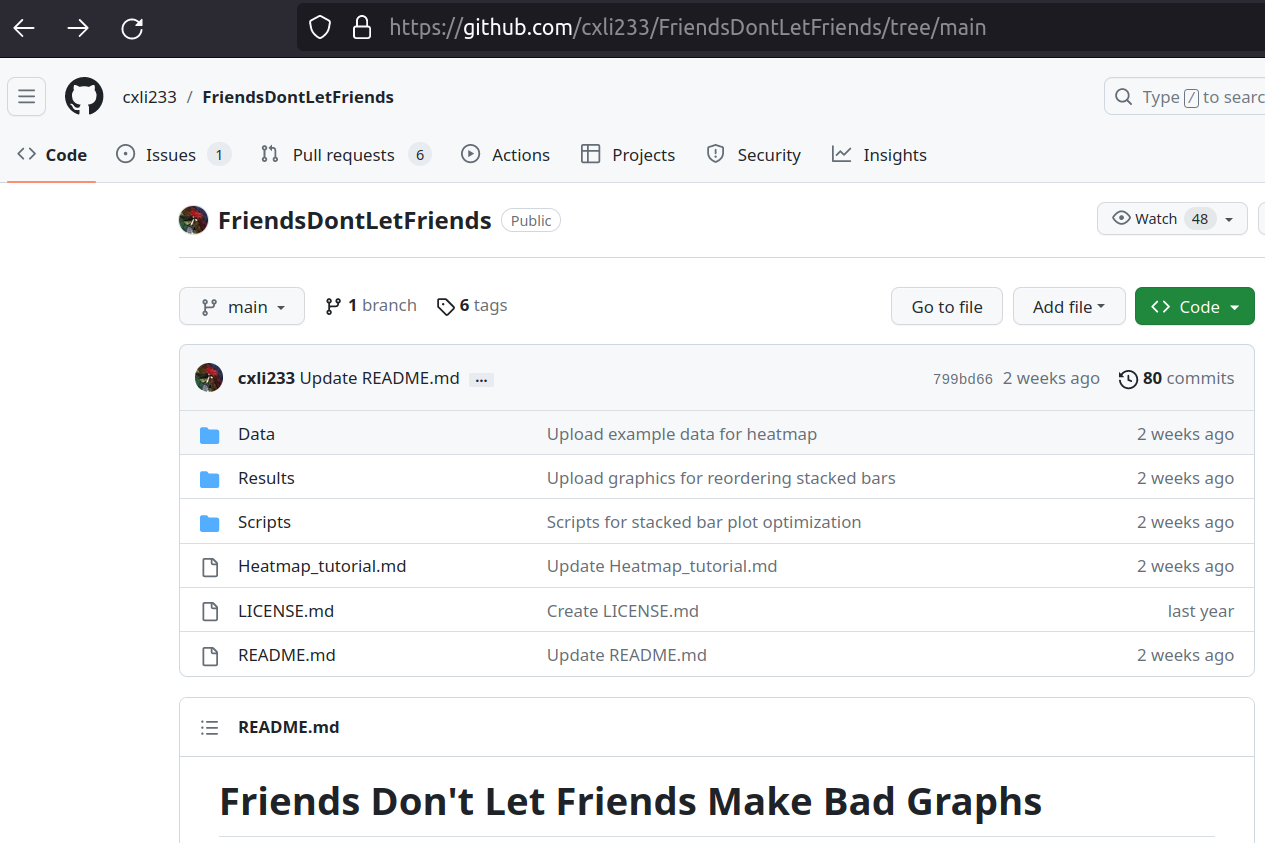

# Friends Don't Let Friends Make Bar Plots for Means Separation
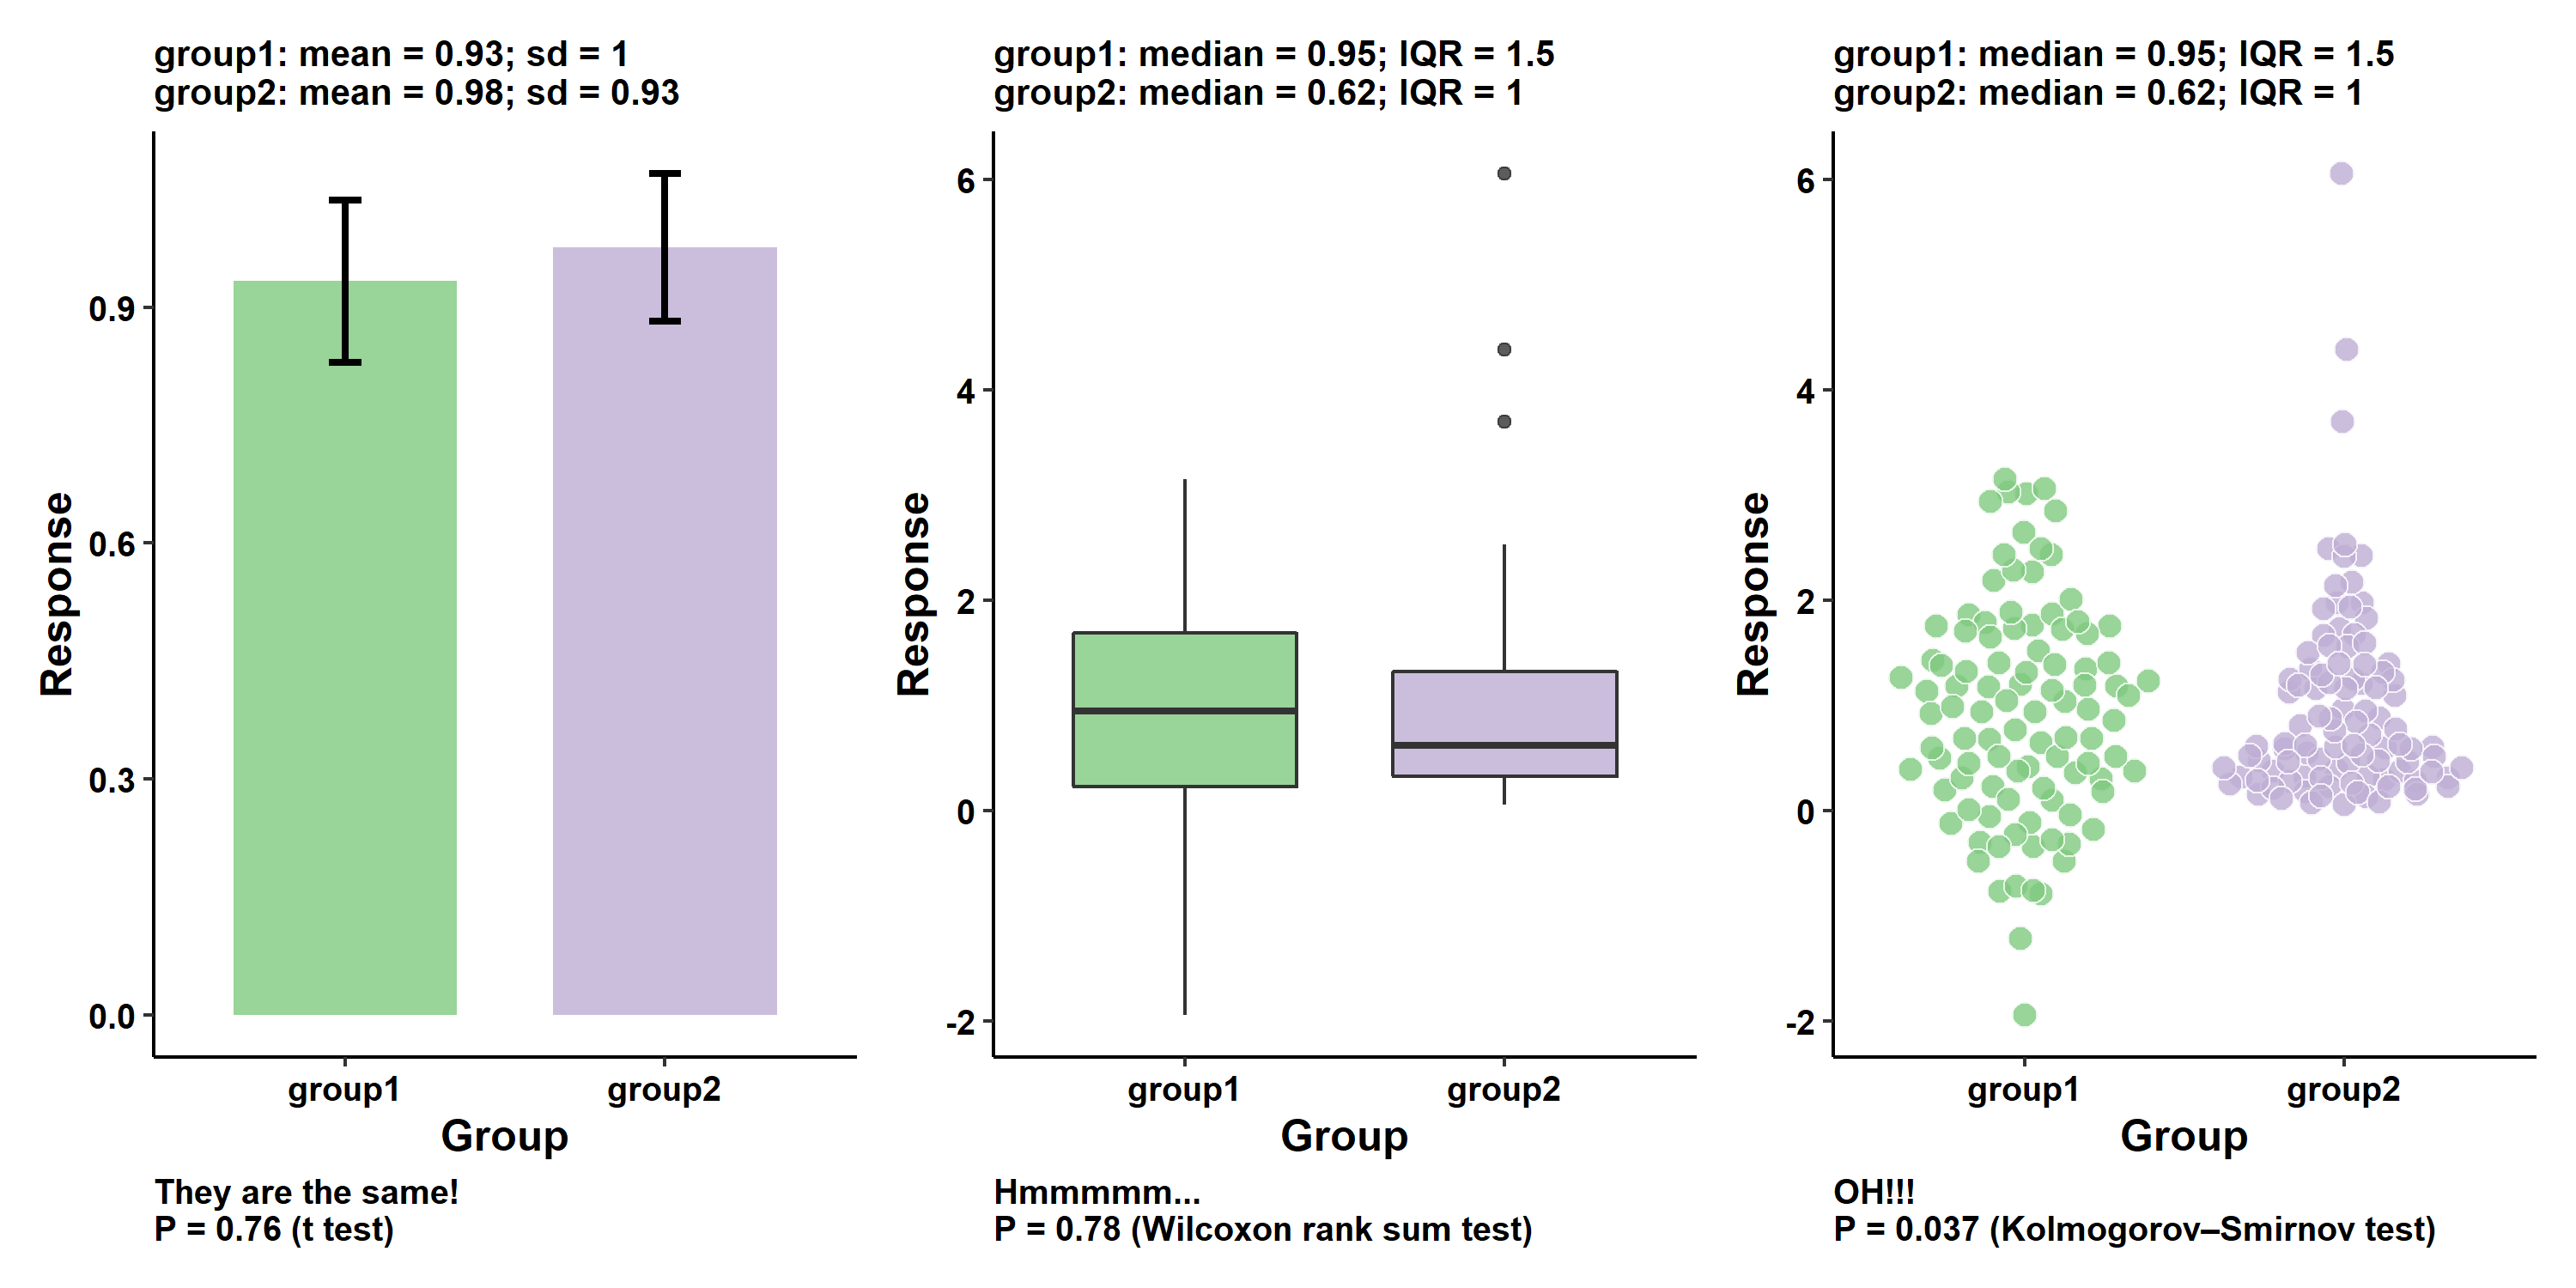
https://github.com/cxli233/FriendsDontLetFriends/raw/main/Results/dont_bar_plot.png

## first let's simulate the data

In [9]:
n=100
group1 = np.random.normal(loc=1, scale=1, size=n)
group2 = np.random.lognormal(
    size=n,
    mean=np.log(1 / np.sqrt(2)),
    sigma=np.sqrt(np.log(2)) 
)
df_wide = pd.DataFrame(data={"group1": group1, "group2":group2})
df_wide

group1    group2
0   1.079428  0.259301
1   3.190202  1.316818
2   0.865108  1.855422
3   1.160518  1.275979
4   1.442698  1.925820
..       ...       ...
95  0.813967  0.869613
96  2.192779  0.858532
97  3.362198  1.930707
98 -0.561812  0.275471
99  0.440123  0.262075

[100 rows x 2 columns]

In [10]:
df_wide.describe()

group1      group2
count  100.000000  100.000000
mean     1.183941    0.953902
std      1.109353    0.701092
min     -1.291147    0.124267
25%      0.445859    0.430789
50%      1.195306    0.784563
75%      1.858881    1.161584
max      4.030216    3.117482

In [11]:
df_wide.mean()

group1    1.183941
group2    0.953902
dtype: float64

<Axes: >

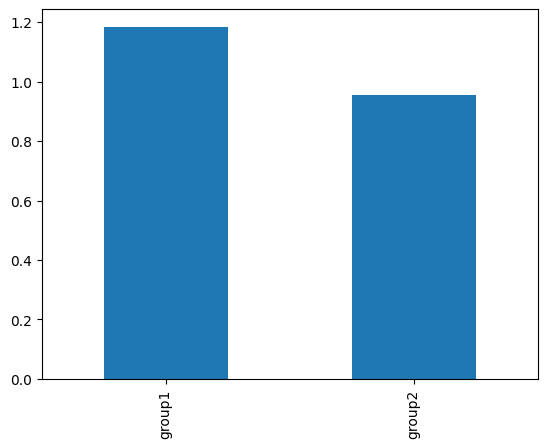

In [12]:
df_wide.mean().plot.bar()

## let's put it in long form


In [13]:
data = {
    "val": np.concatenate([group1, group2]),
    "label": np.concatenate([["group1"] * n, ["group2"] * n])
}
df_long = pd.DataFrame(data)
df_long

val   label
0    1.079428  group1
1    3.190202  group1
2    0.865108  group1
3    1.160518  group1
4    1.442698  group1
..        ...     ...
195  0.869613  group2
196  0.858532  group2
197  1.930707  group2
198  0.275471  group2
199  0.262075  group2

[200 rows x 2 columns]

## it's super easy to make these different plots in seaborn

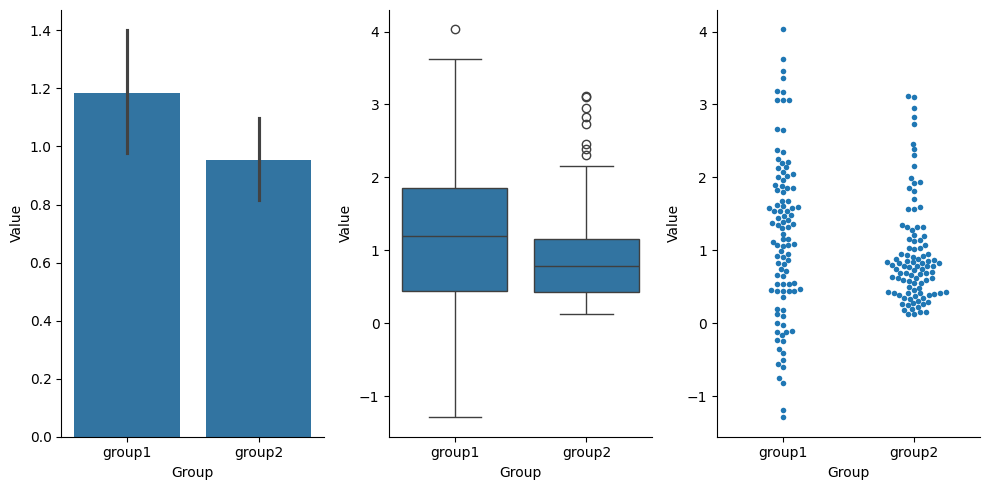

In [28]:
fig, axs = plt.subplots(1, 3, figsize=(10,5))
sns.barplot(data=df_long, x="label", y="val", ax=axs[0])
sns.boxplot(data=df_long, x="label", y="val", ax=axs[1])
sns.swarmplot(data=df_long, x="label", y="val", ax=axs[2], 
              size=4)

for ax in axs:
    ax.spines[['top', 'right']].set_visible(False)
    ax.set_ylabel('Value')
    ax.set_xlabel('Group')
plt.tight_layout()

## Things to ponder
- the bar plot starts at 0 on the y axis, but there are negative numbers
- how could we redundantly encode information?
- what if we still want to see the mean and statistical spread?

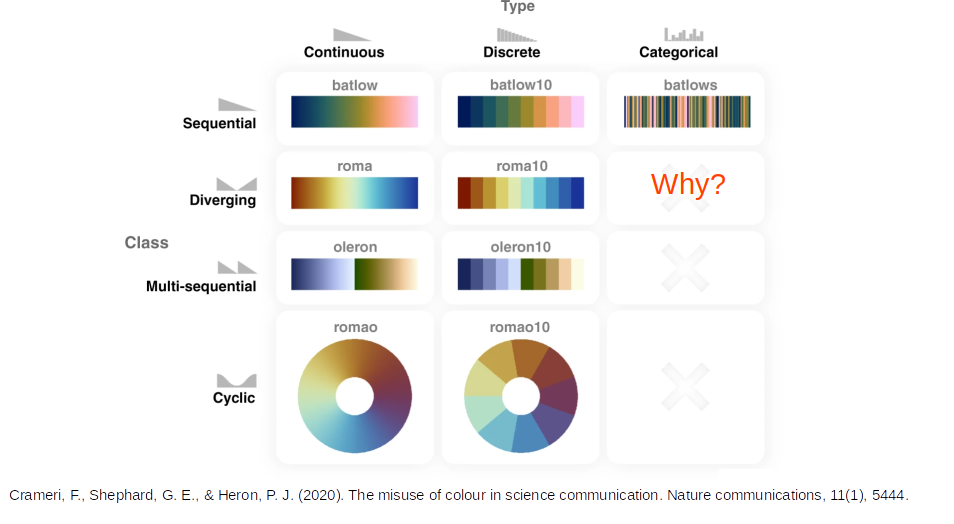

/tmp/ipykernel_60804/2663303872.py:16: UserWarning:

FixedFormatter should only be used together with FixedLocator



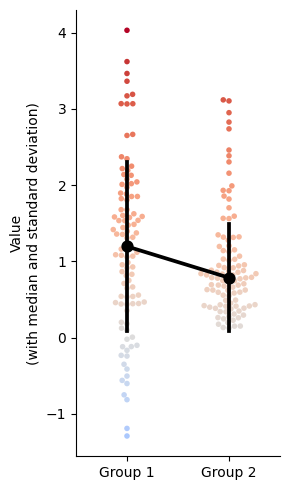

In [15]:
from matplotlib import colors


fig, ax = plt.subplots(1, 1, figsize=(3,5))
divnorm=colors.TwoSlopeNorm(
    vmin=-1 * df_long.val.max(), 
    vcenter=0., 
    vmax=np.max(df_long["val"])
)
sns.swarmplot(data=df_long, x="label", y="val", hue_norm=divnorm, ax=ax, size=4, 
              hue="val", palette='coolwarm', zorder=0)
sns.pointplot(data=df_long, x="label", y="val", estimator=np.median, errorbar="sd",
              
              color='k', zorder=1)
ax.get_legend().remove()
ax.set_xticklabels(["Group 1", "Group 2"])
ax.spines[['top', 'right']].set_visible(False)
ax.set_ylabel('Value\n(with median and standard deviation)')
ax.set_xlabel('')
plt.tight_layout()

# Friends Don't Let Friends Make Heatmap without Checking Outliers
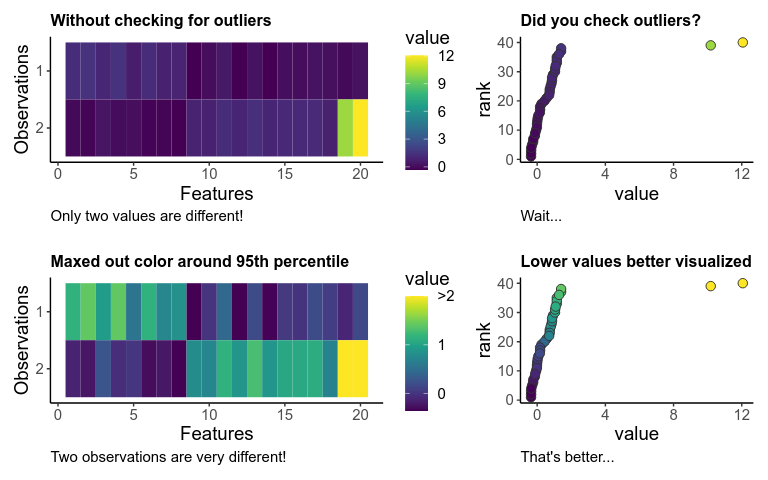


https://github.com/cxli233/FriendsDontLetFriends/raw/main/Results/Check_outliers_for_heatmap.svg

## First let's simulate the data

In [16]:
# data for the left-hand heatmaps
data = np.array([
    [1] * 8 + [0] * 12,
    [0] * 8 + [1] * 12
])
data[1, 18:20] = 12
data = data + np.abs(np.random.normal(loc=0, scale=.4, size=data.shape  )) 

# data for the right-hand plots looking for outliers
data_flat_sorted = np.sort(data.flatten())
y = np.arange(len(data_flat_sorted))

## Now we'll visualize it

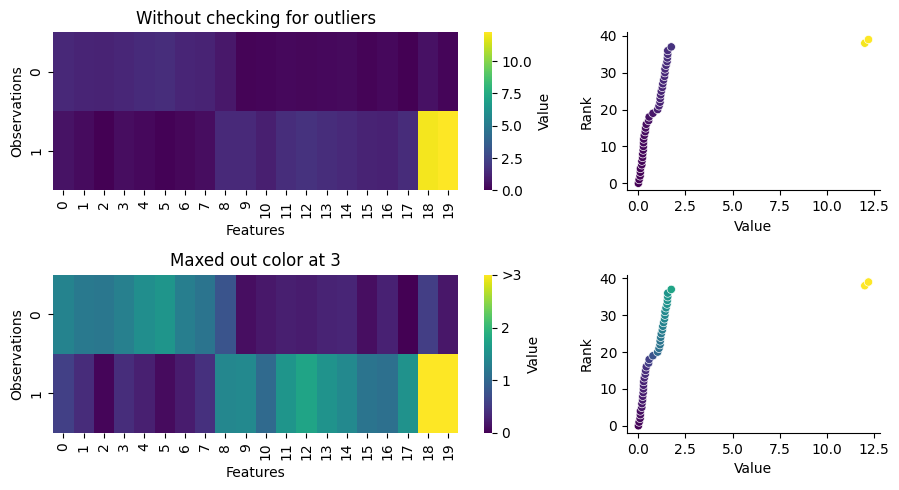

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(9, 5), 
                        gridspec_kw={'width_ratios': [2, 1]})
sns.heatmap(data, cmap='viridis', cbar_kws={'label': 'Value'}, 
            ax=axs[0, 0], vmin=0, vmax=data.max().max()) # now we have a 2D subplot space
sns.scatterplot(x=data_flat_sorted, y=y, ax=axs[0, 1], 
                hue=data_flat_sorted, palette='viridis', legend=False)
max_value = 3
sns.heatmap(data, cmap='viridis', cbar_kws={'label': 'Value'}, ax=axs[1, 0], 
            vmin=0, vmax=max_value)
sns.scatterplot(x=data_flat_sorted, y=y, ax=axs[1, 1], hue=data_flat_sorted, 
                palette='viridis', legend=False, hue_norm=(0, max_value))

axs[0, 0].set_title("Without checking for outliers")
axs[1, 0].set_title(f"Maxed out color at {max_value}")

# TASK: add titles to the right-hand plots

axs[1, 0].collections[0].colorbar.set_ticks(
    [0, 1, 2, 3], 
)
axs[1, 0].collections[0].colorbar.set_ticklabels(
    ["0","1","2",">3"]
)
for row in [0, 1]:
    # left plots (column 0) 
    axs[row, 0].set_ylabel("Observations")
    axs[row, 0].set_xlabel("Features")

    # right plots (column 1)
    axs[row, 1].set_ylabel('Rank')
    axs[row, 1].set_xlabel('Value')
    axs[row, 1].spines[['right', 'top']].set_visible(False)                         
plt.tight_layout()

# Friends Don't Let Friends Make Pie Chart
![image.png](https://raw.githubusercontent.com/cxli233/FriendsDontLetFriends/main/Results/dont_pie_chart.svg)


https://github.com/cxli233/FriendsDontLetFriends/raw/main/Results/dont_pie_chart.svg

## Is there an even better way?

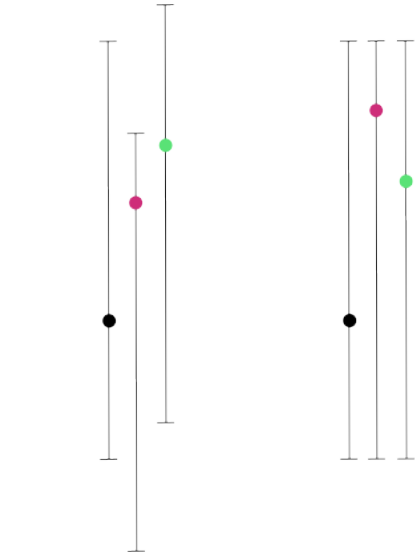

## First, let's make the data

In [21]:
types = ["Type I", "Type II", "Type III", "Type IV"]
percents1 = [15, 35, 30, 20]
percents2 = [10, 25, 35, 30]

df1 = pd.DataFrame({"Types":types, "Percents": percents1}).set_index('Types')
df2 = pd.DataFrame({"Types":types, "Percents": percents2}).set_index('Types')
df2

Percents
Types             
Type I          10
Type II         25
Type III        35
Type IV         30

## Another way to make subplots, 
which allows you to make different-sized subplots

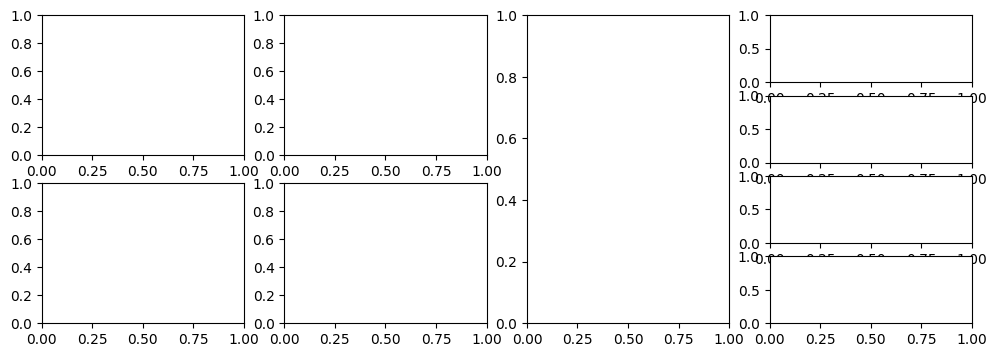

In [22]:
fig = plt.figure(figsize=(12, 4))
ax_topleft = fig.add_subplot(2, 4, 1)
ax_topmid = fig.add_subplot(2, 4, 2)
ax_lowleft = fig.add_subplot(2, 4, 5)
ax_lowmid = fig.add_subplot(2, 4, 6)
ax_2ndright = fig.add_subplot(1, 4, 3)
ax_right1 = fig.add_subplot(4, 4, 4)
ax_right2 = fig.add_subplot(4, 4, 8)
ax_right3 = fig.add_subplot(4, 4, 12)
ax_right4 = fig.add_subplot(4, 4, 16)

/tmp/ipykernel_60804/251990170.py:55: UserWarning:

FixedFormatter should only be used together with FixedLocator



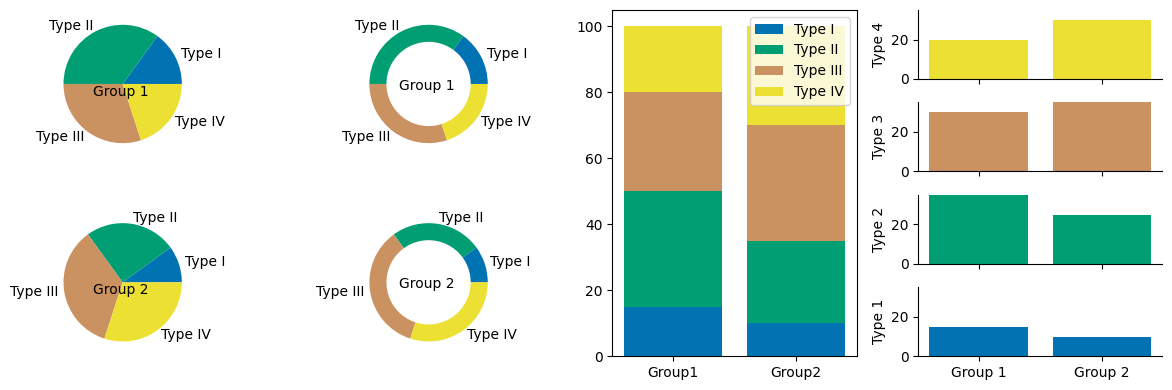

In [23]:
fig = plt.figure(figsize=(12, 4))
ax_topleft = fig.add_subplot(2, 4, 1)
ax_topmid = fig.add_subplot(2, 4, 2)
ax_lowleft = fig.add_subplot(2, 4, 5)
ax_lowmid = fig.add_subplot(2, 4, 6)
ax_2ndright = fig.add_subplot(1, 4, 3)
ax_right1 = fig.add_subplot(4, 4, 4)
ax_right2 = fig.add_subplot(4, 4, 8)
ax_right3 = fig.add_subplot(4, 4, 12)
ax_right4 = fig.add_subplot(4, 4, 16)

palette = list(sns.color_palette("colorblind"))
colors = [palette[i] for i in [0, 2, 5, 8]]

# pie charts
df1.plot.pie(y='Percents', legend=False, ax=ax_topleft, 
             colors=colors, label='')
df2.plot.pie(y='Percents', legend=False, ax=ax_lowleft, 
             colors=colors, label='')
ax_topleft.text(-.5, -.2, s='Group 1')
ax_lowleft.text(-.5, -.2, s='Group 2')


#  hacking a donut chart
df1.plot.pie(y='Percents', legend=False, ax=ax_topmid, 
             colors=colors, label='')
df2.plot.pie(y='Percents', legend=False, ax=ax_lowmid, 
             colors=colors, label='')
ax_topmid.add_artist(plt.Circle( (0,0), 0.7, color='white'))
ax_lowmid.add_artist(plt.Circle( (0,0), 0.7, color='white'))
ax_topmid.text(-.5, -.1, s='Group 1')
ax_lowmid.text(-.5, -.1, s='Group 2')

# stacked bar chart
df = df1.copy()
df = df.rename(columns={"Percents": "Group1"})
df['Group2'] = df2['Percents']
last = np.array([0, 0])
for (type, row), color in zip(df.iterrows(), colors):
    ax_2ndright.bar(x=row.index, height=row.values, 
                    bottom=last, label=type, color=color)
    last = row + last
ax_2ndright.legend()
    
# stack of bar charts
right_axs = [ax_right1, ax_right2, ax_right3, ax_right4][::-1]
i_chart = 0
for (type, row), ax, color in zip(df.iterrows(), right_axs, colors):
    i_chart += 1
    ax.bar(x=row.index, height=row.values, color=color)
    ax.set_ylabel(f'Type {i_chart}', rotation=90)
    ax.set_ylim((0, df.max().max()))
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_xticklabels([])
ax_right4.set_xticklabels(['Group 1', 'Group 2'])

plt.tight_layout()

New FriendsDontLetFriends?
# Friends don't let friends make word clouds?


## Data
based on survey answers to the question *"If you do open science, what kinds of resources did you find most useful for learning how to do open science? (e.g., tutorials, summer schools, hackathons, videos, etc.)"*

In [24]:
texts = [
    "hackathon school tutorial",
    "hackathon summer school",
    "video lecture blog",
    "course lecture online practice",
    "ohbm brainhack hackathon"
]
text = (" ").join(texts)
text

'hackathon school tutorial hackathon summer school video lecture blog course lecture online practice ohbm brainhack hackathon'

## Word cloud

(-0.5, 399.5, 199.5, -0.5)

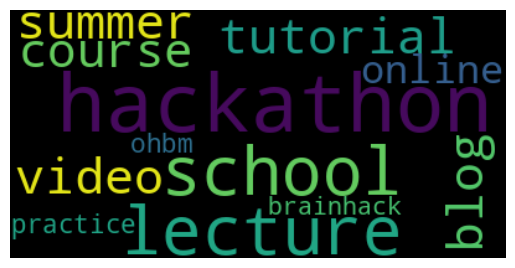

In [25]:
from wordcloud import WordCloud


wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

- How much bigger is "hackathon" than "school"?
- does word length factor into size?
- what does color mean? lightness?
- why are words placed where they are? beside other words?

## Let's make a more interpretable graph

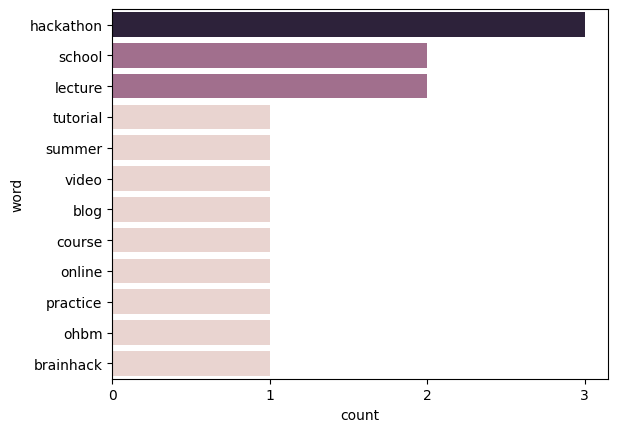

In [26]:
words = text.split()
wordfreq = [(word, words.count(word)) for word in words]
df = pd.DataFrame(wordfreq, columns = ["word", "count"])
df = df.drop_duplicates()
df = df.sort_values(by="count", ascending=False)

fig, ax = plt.subplots()
sns.barplot(data=df, y="word", x="count", hue="count", orient='h', ax=ax)
ax.legend().set_visible(False)
ax.xaxis.set_ticks(range(df["count"].max() + 1)) # make ticks whole numbers

# Let's peek behind the scenes
aka the basics of matplotlib

### Coding styles
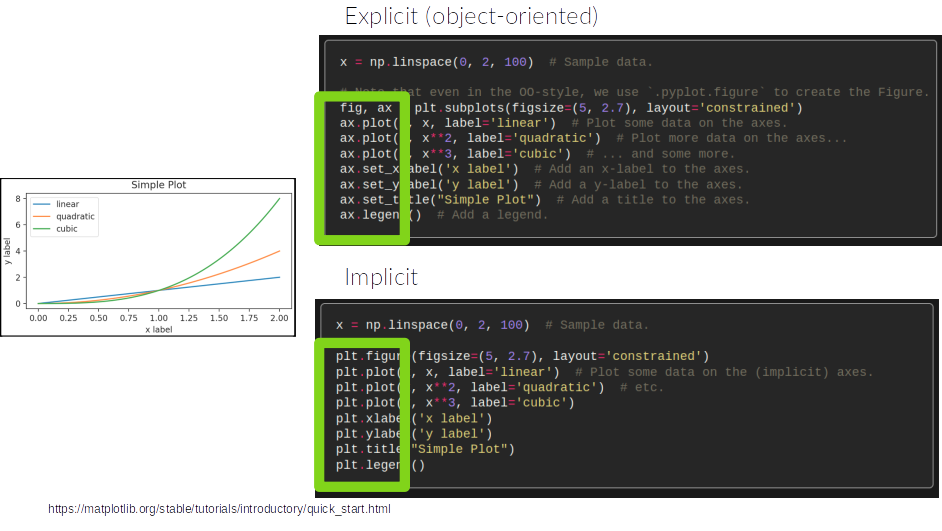

## 3 layers of matplotlib
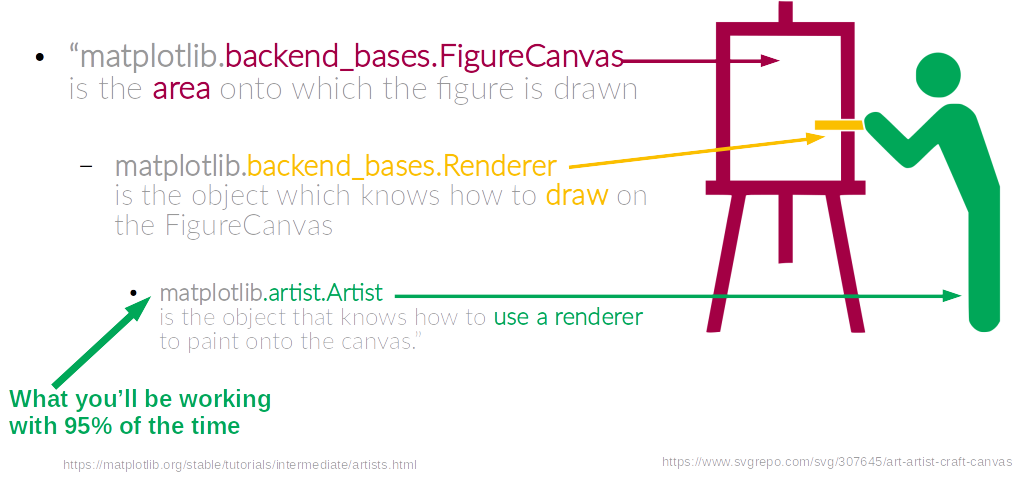

## 2 types of artists
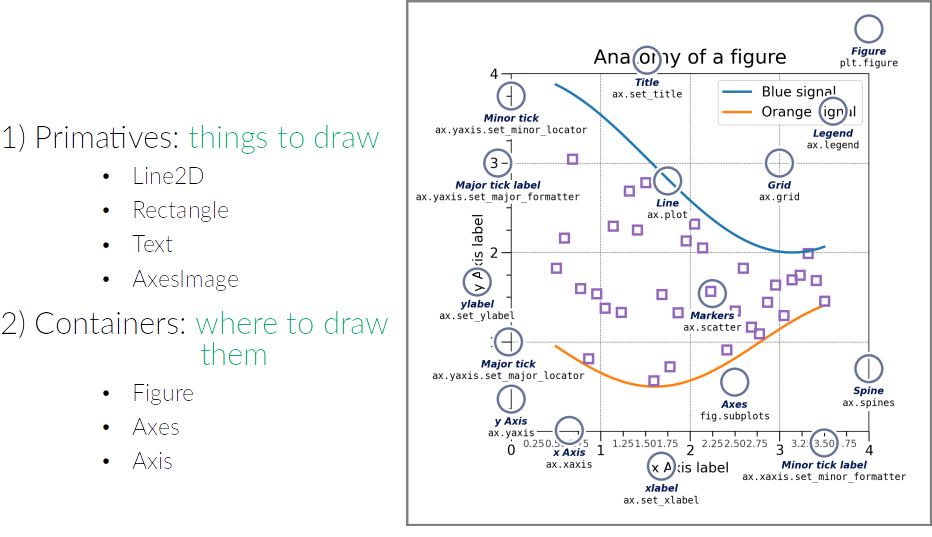

## What actually is an artist??
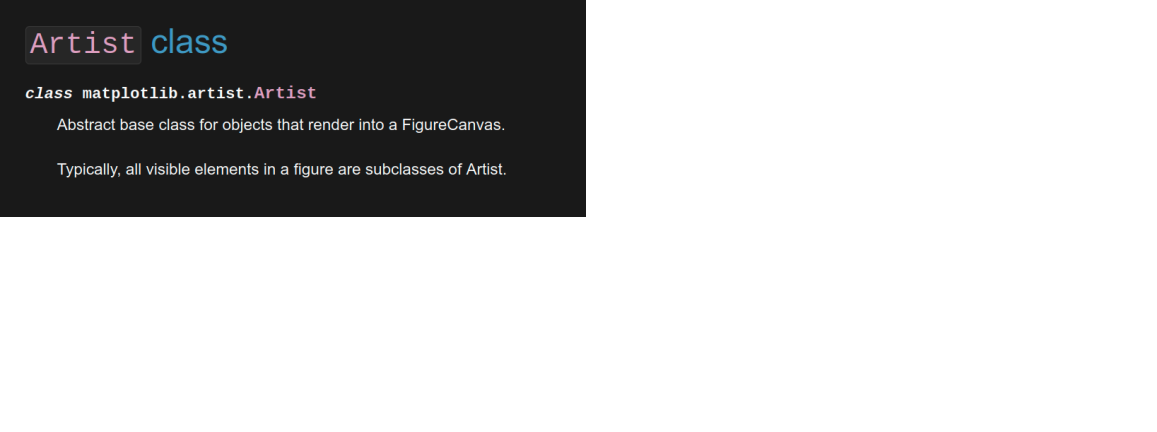

## TL;DR It's artists all the way down
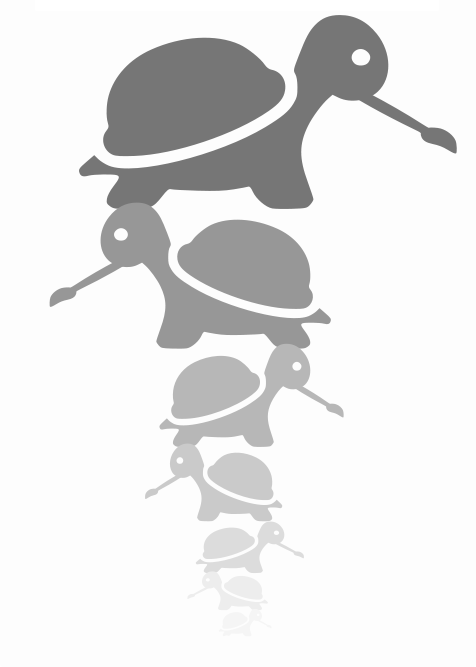